# Esonero 1 - 8 Aprile 2021

Completare i seguenti esercizi tramite uno o più blocchi di codice e descrivendo le operazioni effettuate

### Punteggio Esercizi

    1a: 1
    1b: 1.5
    1c: 2
    1d: 1
    2: 1.5
    3: 1
    4: 1
    5: 1


In [1]:
import numpy as np
from skimage.color import rgb2gray
from scipy.ndimage import convolve

import imageio
from skimage.color import rgb2gray

import matplotlib.pyplot as plt
%matplotlib inline 

def myimshow(I, **kwargs):
    # utility function to show image
    plt.figure();
    plt.axis('off')
    plt.imshow(I, cmap=plt.gray(), **kwargs)

# Esercizio 1

## Filtri di Gabor

Il filtro di Gabor (in forma semplificata) è definito dalla seguente funzione che restituisce due parti (reale e immaginaria)


$$RE_g(x,y,\omega,\theta) = \frac{\omega^2}{4\pi^3}\left[\exp\left\{-(\omega^2/8\pi^2) (4x'^2 + y'^2)\right\}\right]\exp\left(\pi^2/2\right)(\omega x \cos \theta)$$

$$IM_g(x,y,\omega,\theta) = \frac{\omega^2}{4\pi^3}\left[\exp\left\{-(\omega^2/8\pi^2) (4x'^2 + y'^2)\right\}\right]\exp\left(\pi^2/2\right)(\omega x \sin \theta)$$

dove $x' = x \cos \theta + y \sin \theta$ e $y' = y \cos \theta. - x \sin \theta$. L'implementazione è data dal codice sottostante: 

In [2]:
zebra =  rgb2gray(imageio.imread('zebra.jpg'))

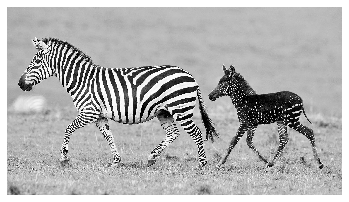

In [3]:
myimshow(zebra)

In [4]:
def genGabor(sz, omega, theta, func=np.cos):
    radius = (int(sz[0]/2.0), int(sz[1]/2.0))
    [x, y] = np.meshgrid(range(-radius[0], radius[0]), range(-radius[1], radius[1]))

    x1 = x * np.cos(theta) + y * np.sin(theta)
    y1 = -x * np.sin(theta) + y * np.cos(theta)
    
    gauss = omega**2 / (4*np.pi**3) * np.exp(- omega**2 / (8*np.pi**2) * ( 4 * x1**2 + y1**2))
    sinusoid = func(omega * x1) * np.exp(np.pi**2 / 2)
    gabor = gauss * sinusoid
    return gabor

`sz` rappresenta la dimensione del filtro, `omega` la frequenza e `theta` l'orientamento.

1. Plottare il filtro per valori a scelta dei parametri

In [ ]:
plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

LowPass = genGabor(50,1,1)
plt.subplot(131), plt.imshow(LowPass, "gray"), plt.title("Gabor Filter")



2. Applicare il filtro di Gabor alla figura della zebra e plottare il risultato. Cosa potete dire del filtro?

In [ ]:
g=genGabor((64,64), 0.3, np.pi/4, func=np.cos)
res = convolve2d(zebra, g) 
plt.imshow(res)

3. Aggiustare i parametri di ampiezza e rotazione per individuare le strisce verticali. plottare il risultato

Per la seguente immagine _gabor1.jpg_

![](gabor1.jpg)

4. Qual è il filtro più semplice che permetterebbe di individuare i contorni? Giustificare la risposta

# Esercizio 2

Riconoscere il filtro che ha generato questa immagine a partire dall'immagine contenente le forme. Fornire un esempio.

![](filter2.jpg)

Non c'è applicato nessun filtro, è una semplice conversione in scala di grigi.

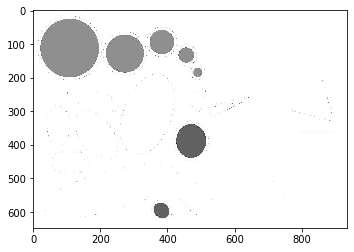

In [86]:

from skimage import filters
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import image as mp_image
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from matplotlib import cm
from scipy.ndimage import affine_transform, zoom
from scipy import misc,linalg
import skdemo
from skimage import io, color
import skimage

%matplotlib inline

IMGSRC = ''

def myResourcePath(fname):
    filename = os.path.join(IMGSRC, fname)
    if not os.path.exists(filename):
        raise RuntimeError(f'file not found {filename}')
    return filename



pixelated = io.imread(myResourcePath('cerchi.jpg'))
pixelated = color.rgb2gray(pixelated)


plt.imshow(pixelated)

# Esercizio 3

Scrivere un filtro 3x3 che restituisce un valore positivo se la media sulla diagonale principale è inferiore al valore del centro, e negativo altrimenti. Cosa calcola tale filtro? Illustrarlo su un'immagine

In [69]:
M1=np.array([[1/3,0,0],
   [0,1/3,0],
   [0,0,1/3]])
M2=np.array([[0,0,0],
   [0,1,0],
   [0,0,0]])
M = M1 - M2
#IL FILTRO M è CIO' CHE CERCHIAMO. Siccome la somma dei suoi elementi è pari a 0, siamo in presenza di un filtro passa alto,
#cioè un filtro che mette in risalto i bordi

print(M)

[[ 0.33333333  0.          0.        ]
 [ 0.         -0.66666667  0.        ]
 [ 0.          0.          0.33333333]]


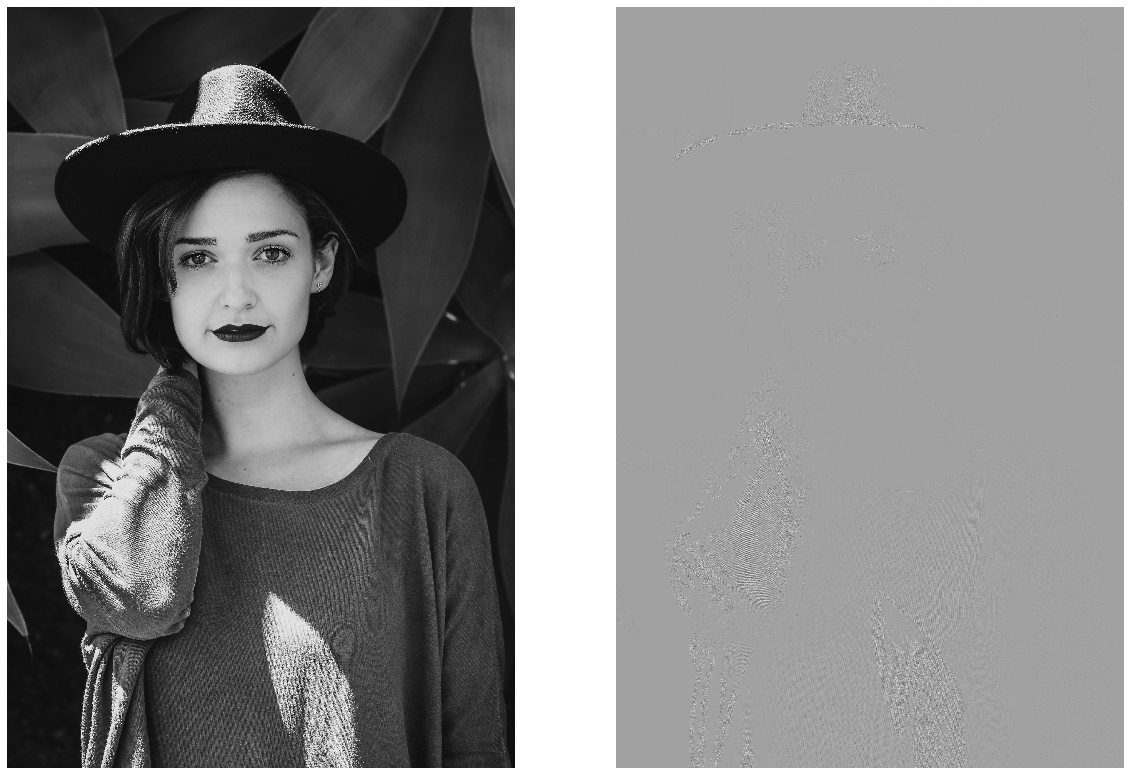

In [71]:
def convolve2d(image, kernel):
    """
    This function which takes an image and a kernel and returns the convolution of them.

    :param image: a numpy array of size [image_height, image_width].
    :param kernel: a numpy array of size [kernel_height, kernel_width].
    :return: a numpy array of size [image_height, image_width] (convolution output).
    """
    
    kernel_height, kernel_width = kernel.shape
    
    a = kernel_width//2
    b = kernel_height//2
    
    
    # Flip the kernel
    kernel = np.flipud(np.fliplr(kernel))
    # convolution output
    output = np.zeros_like(image)

    # Add zero padding to the input image
    image_padded = np.zeros((image.shape[0] + 2*a, image.shape[1] + 2*b))
    image_padded[a:-a, b:-b] = image

    # Loop over every pixel of the image
    for x in range(image.shape[1]):
        for y in range(image.shape[0]):
            # element-wise multiplication of the kernel and the image
            output[y, x]=(kernel * image_padded[y: y+kernel_width, x: x+kernel_height]).sum()

    return output

image = io.imread(myResourcePath('model1.jpg'))
image= color.rgb2gray(image)

fig = plt.figure(figsize=(20, 20))

fig.add_subplot(1, 2, 1) 
plt.imshow(image,cmap=cm.gray)
plt.axis('off')

out = convolve2d(image,M)

fig.add_subplot(1, 2, 2) 
plt.imshow(out,cmap=cm.gray)
plt.axis('off')

plt.show()

# Esercizio 4

Identificare il filtro e riprodurre lo sketch in figura

![](model1.jpg)
![](model1_post.jpg)

# Esercizio 5

Definire una matrice di roto traslazione che effettua una rotazione di 45° in senso orario in (5, 5) e una traslazione di 50 px sull'asse x.

Mostrare e descrivere tutti i passaggi: dalla definizione della matrice all'applicazione della trasformazione

suggested threashold is 0.427734375


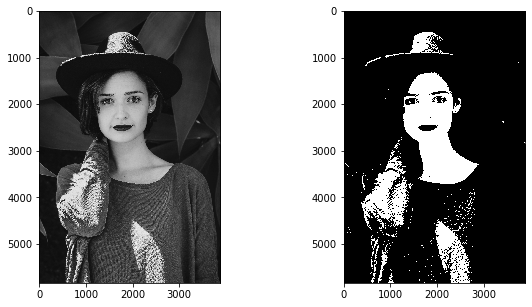

In [66]:
from skimage import filters

# i filtri di threasholding sono numerosi, ne vediamo uno che funziona per immagini in scala di grigi
image = io.imread(myResourcePath('model1.jpg'))
image= color.rgb2gray(image)

threshold = filters.threshold_otsu(image)
print(f'suggested threashold is {threshold}')

skdemo.imshow_all(image, image > threshold)

La soluzione più semplice per definire la matrice di rototraslazione è utilizzare skimage

OpenCV-Python Version 4.5.1


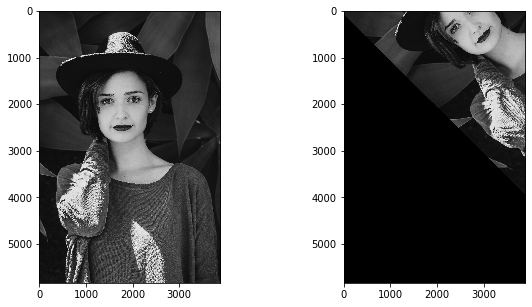

In [73]:
import os
import numpy as np
import cv2 # OpenCV-Python
%matplotlib inline
import matplotlib.pyplot as plt
from skimage.transform import SimilarityTransform
from skimage import transform

print("OpenCV-Python Version %s" % cv2.__version__)

# in questa folder sono memorizzati alcuni file a supporto (path relativo al notebook corrente)
IMGSRC = ''

def myResourcePath(fname):
    filename = os.path.join(IMGSRC, fname)
    if not os.path.exists(filename):
        raise RuntimeError(f'file not found {filename}')
    return filename


img = cv2.imread(myResourcePath('model1.jpg'), cv2.IMREAD_GRAYSCALE)
rows,cols = img.shape

M = cv2.getRotationMatrix2D((5,5),45,1) # params: center, angle, scale
dst1 = cv2.warpAffine(img,M,(cols,rows))


tform = SimilarityTransform(translation=(50, 0), rotation=np.deg2rad(45))
warped = transform.warp(img, tform)

skdemo.imshow_all(img, warped)

In [32]:
print(tform)

<SimilarityTransform(matrix=
    [[ 0.70710678, -0.70710678, 50.        ],
     [ 0.70710678,  0.70710678,  0.        ],
     [ 0.        ,  0.        ,  1.        ]])>


Oppure lo potevo fare così: